Dataset loaded successfully.
Sample data:
  label                                               text
0  REAL  Payal has accused filmmaker Anurag Kashyap of ...
1  FAKE  A four-minute-long video of a woman criticisin...
2  FAKE  Republic Poll, a fake Twitter account imitatin...
3  REAL  Delhi teen finds place on UN green list, turns...
4  REAL  Delhi: A high-level meeting underway at reside...

Data shape: (3729, 2)

Starting text preprocessing...
Preprocessing complete.
Sample processed text:
0    payal accused filmmaker anurag kashyap behavin...
1    fourminutelong video woman criticising governm...
2    republic poll fake twitter account imitating a...
3    delhi teen find place un green list turn glass...
4    delhi highlevel meeting underway residence raj...
Name: processed_text, dtype: object

Starting TF-IDF vectorization...
TF-IDF vectorization complete.
Training data shape: (2983, 5000)

Starting Logistic Regression model training...
Model training complete.

--- Model Evaluati

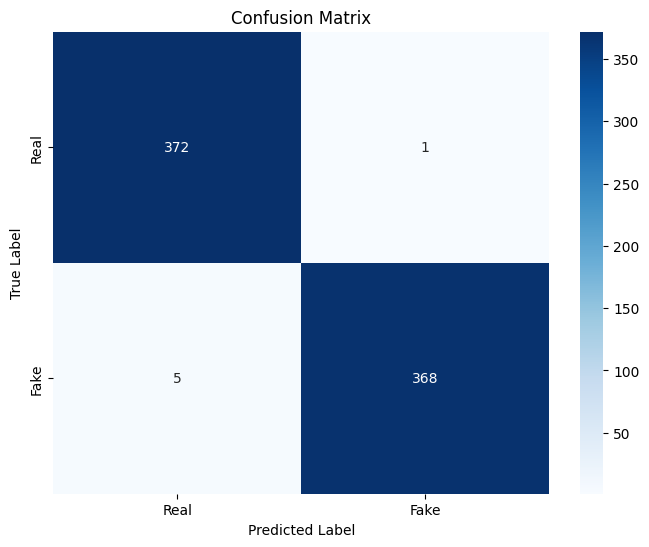


--- Simple Command-Line UI ---


Enter a news article or press 'q' to quit:  q


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading ---
# Please replace 'path/to/your/dataset.csv' with the actual path to your dataset.
# The dataset is expected to have 'text' and 'label' columns.
try:
    data = pd.read_csv('Desktop/news_dataset.csv')
    print("Dataset loaded successfully.")
    print("Sample data:")
    print(data.head())
    print("\nData shape:", data.shape)
except FileNotFoundError:
    print("Error: Dataset file not found.")
    print("Please download a fake news dataset (e.g., from Kaggle) and update the file path.")
    exit()

# --- 2. Data Preprocessing ---
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Cleans and preprocesses the text data.
    - Converts text to lowercase
    - Removes special characters and numbers
    - Tokenizes the text
    - Removes stopwords
    - Applies lemmatization
    """
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

print("\nStarting text preprocessing...")
data['processed_text'] = data['text'].apply(preprocess_text)
print("Preprocessing complete.")
print("Sample processed text:")
print(data['processed_text'].head())

# --- 3. Feature Extraction (TF-IDF Vectorization) ---
# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Split data into training and testing sets
X = data['processed_text']
y = data['label'] # Assuming 'label' column exists for 'real' or 'fake'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nStarting TF-IDF vectorization...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("TF-IDF vectorization complete.")
print("Training data shape:", X_train_tfidf.shape)

# --- 4. Model Training ---
print("\nStarting Logistic Regression model training...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
print("Model training complete.")

# --- 5. Model Evaluation ---
print("\n--- Model Evaluation ---")

# Predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['REAL', 'FAKE']) # Adjust labels if your dataset uses different names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 6. Command-Line UI for a single prediction ---
def predict_single_article(article_text):
    """
    Takes a single article text, preprocesses it, and predicts its class.
    """
    processed_text = preprocess_text(article_text)
    # The TF-IDF vectorizer expects an iterable (list of strings)
    processed_text_tfidf = tfidf_vectorizer.transform([processed_text])
    prediction = model.predict(processed_text_tfidf)
    return prediction[0]

print("\n--- Simple Command-Line UI ---")
while True:
    user_input = input("Enter a news article or press 'q' to quit: ")
    if user_input.lower() == 'q':
        break
    
    prediction = predict_single_article(user_input)
    print(f"Prediction: This news article is likely {prediction.upper()}.")